In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("~/Desktop/DATASCI 207/fake_job_postings.csv")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

# Clean Data and Feature Engineering

Our baseline model will be a simple logisitc regression. Therefore, the first few text-based columns can be dropped as they are too descriptive and varied. Additionally, all columns with NA values will also be dropped to further clean the data. The resulting features we will use for the baseline model include 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', and 'function'.

In [4]:
df_clean =df.drop(["department","job_id","title","location","salary_range","company_profile","description","requirements","benefits"],axis=1)
df_clean=df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7615 entries, 3 to 17878
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   telecommuting        7615 non-null   int64 
 1   has_company_logo     7615 non-null   int64 
 2   has_questions        7615 non-null   int64 
 3   employment_type      7615 non-null   object
 4   required_experience  7615 non-null   object
 5   required_education   7615 non-null   object
 6   industry             7615 non-null   object
 7   function             7615 non-null   object
 8   fraudulent           7615 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 594.9+ KB


# Exploratory Data Analysis

fraudulent
0    7273
1     342
Name: count, dtype: int64


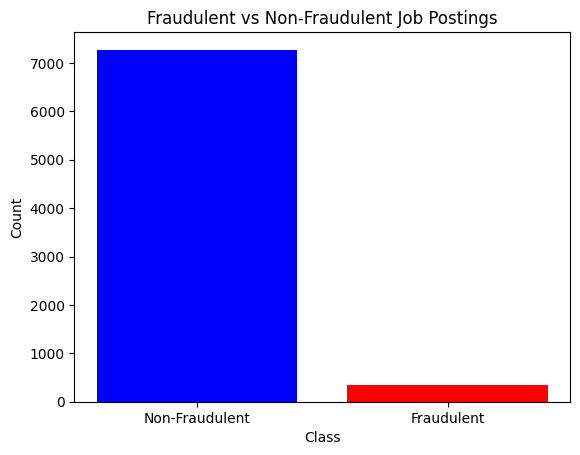

0.047023236628626425


In [5]:
print(df_clean['fraudulent'].value_counts())

data = {'Non-Fraudulent': 7273, 'Fraudulent': 342}

fraudulent_data = list(data.values())
labels = list(data.keys())

plt.bar(labels, fraudulent_data, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Fraudulent vs Non-Fraudulent Job Postings')

plt.show()
print(342/7273)

After cleaning the data, we can see that only 342 posts or approximately 4.7% of the data are labeled fake. This indicates that distribution is highly imbalanced, so accuracy may not be the best metric to evaluate the baseline model. Precision and recall will be used instead for model evaluation. 

In [6]:
df_clean

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
3,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
9,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0
10,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
...,...,...,...,...,...,...,...,...,...
17867,0,1,0,Full-time,Entry level,Unspecified,Human Resources,Sales,0
17870,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17874,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17876,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0


/var/folders/fc/9rhjbth52nq29f69svn0z04h0000gn/T/ipykernel_32497/3538357937.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/var/folders/fc/9rhjbth52nq29f69svn0z04h0000gn/T/ipykernel_32497/3538357937.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/var/folders/fc/9rhjbth52nq29f69svn0z04h0000gn/T/ipykernel_32497/3538357937.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/var/folders/fc/9rhjbth52nq29f69svn0z04h0000gn/T/ipykernel_32497/3538357937.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fontsize=10)
/var/folders/fc/9rhjbth52nq29f69svn0z04h0000gn/T/ipykernel_32497/3538357937.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels,  fon

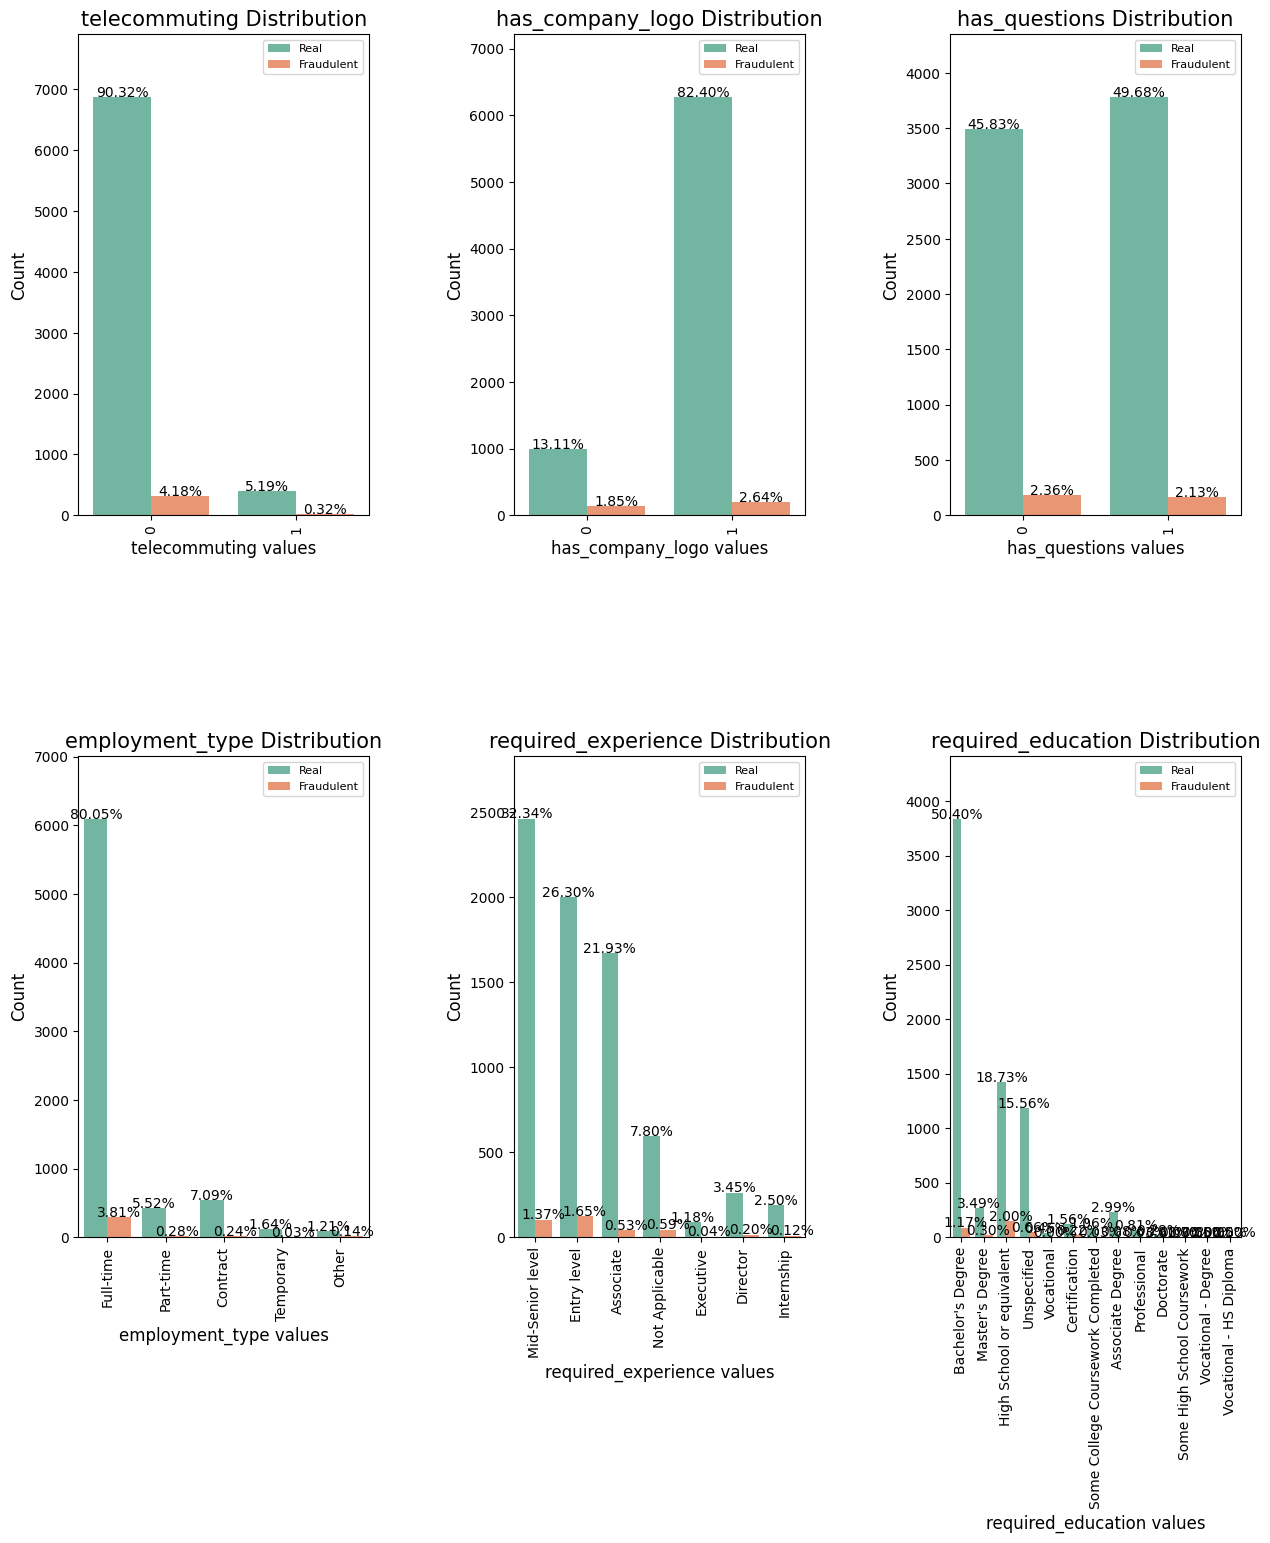

In [7]:
cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education"]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(df_clean[cat_cols]): 
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=df_clean, hue='fraudulent', palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(labels=['Real', 'Fraudulent'], fontsize=8)
    plt.xticks(rotation=90) 
    total = len(df_clean)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


plt.show()

We can use the bar plots of the distributions of each of the key features to do more exploratory data analysis in comparing the the real and fraudulent job postings. For telecommuting, both targets follow a distribution where a majority of the telecommuting values are 0. A larger proportion of the data has a company logo for both targets as well, although a much larger proportion of the real job postings have a company logo compared to that of the fraudulent postings. For both targets, the distribution of having or not having questions is roughly equal, although for real postings, the proportion of having questions is slightly larger wheras the opposite is true for the fraudulent postings. For employment type, the majority of the distribution for both targets is full-time, while contract also has the second highest count for real postings. For fraudulent postings however, part-time has the second highest count instead. For experience level, the highest count for real postings is attributed to mid-senior level positions, wheras for fradulent postings, the highest count is attributed to entry level roles. For required education, the highest count for real postings is attributed to to Bachelor's degree, wheras for fraudulent postings, it's attributed to high school or equivalent. Overall, the required experience and education features seem to indicate the biggest discrepancy between the real and fraudulent positings and may be the most significant features to examine in the training model. On the other hand, the telecommuting feature has a similar distribution for both targets, and since the majority of values are 0, it may not be a helpful feature and can be dropped. 

In [8]:
df_clean=df_clean.drop(["telecommuting"],axis=1)
df_clean

,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
3,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
9,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0
10,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
...,...,...,...,...,...,...,...,...
17867,1,0,Full-time,Entry level,Unspecified,Human Resources,Sales,0
17870,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17874,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17876,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0


# Baseline

In [20]:
# assume model only returns 0 for all inputs, accuracy is:
7273/(7273+342)

0.9550886408404465

# Model 1: Logistic Regression

In [9]:
one_hot_encoded_data = pd.get_dummies(df_clean, columns = ['employment_type', 'required_experience',"required_education","industry","function"]) 
one_hot_encoded_data.columns
df_final=one_hot_encoded_data
df_final['fraudulent'].value_counts()

fraudulent
0    7273
1     342
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split 
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')
X= df_final.drop(['fraudulent'],axis=1) 
y=df_clean['fraudulent'] 
  
# using the train test split function 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.20,  
                                   shuffle=True) 

2023-11-06 17:42:59.290735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

logreg =  LogisticRegression(solver='liblinear') 
# fit the model with data 
logreg.fit(X_train,y_train) 

# predicting 
y_pred=logreg.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy: 0.9606040709126723
Precision: 0.7857142857142857
Recall: 0.16176470588235295


# Model 2: Random Forest, Hyperparameter Tuning, Imbalanced Data

In [12]:
#using SMOTE to handle imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [13]:
y_resampled.value_counts()

fraudulent
0    7273
1    7273
Name: count, dtype: int64

In [14]:
X_resampled

,has_company_logo,has_questions,employment_type_Contract,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Associate,required_experience_Director,required_experience_Entry level,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,1,0,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,1,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,0,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14542,1,1,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
14543,0,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14544,1,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
# using the train test split function on the resampled data 
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_resampled,y_resampled, 
                                   random_state=104,  
                                   test_size=0.20,  
                                   shuffle=True) 

In [16]:
#logistic regression on resampled data
logreg =  LogisticRegression(solver='liblinear') 
# fit the model with data 
logreg.fit(X_train_rs,y_train_rs) 

# predicting 
y_pred=logreg.predict(X_test_rs) 
print("Accuracy:",metrics.accuracy_score(y_test_rs, y_pred)) 

print("Precision:",metrics.precision_score(y_test_rs, y_pred)) 

print("Recall:",metrics.recall_score(y_test_rs, y_pred)) 

Accuracy: 0.9120274914089347
Precision: 0.898453261600538
Recall: 0.9271339347675226


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()

In [18]:
#random search
from scipy.stats import randint
# random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
          }

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train_rs,y_train_rs)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

Best random search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 60}
Best random search score is: 0.9686321124626803


In [19]:
#grid search
# grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train_rs,y_train_rs)

# grid search results
print('Best grid search hyperparameters are: '+str(model_grid.best_params_))
print('Best grid search score is: '+str(model_grid.best_score_))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-

Best grid search hyperparameters are: {'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best grid search score is: 0.9675149638964794


In [18]:
#rf model using random search hyperparameters
random_rf = RandomForestClassifier(criterion='gini', max_depth=70, max_features=1, min_samples_leaf=1, min_samples_split=4, n_estimators=60)
random_rf.fit(X_train_rs, y_train_rs)
y_pred = random_rf.predict(X_test_rs)
accuracy = metrics.accuracy_score(y_test_rs, y_pred)
precision = metrics.precision_score(y_test_rs, y_pred)
recall = metrics.recall_score(y_test_rs, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9683848797250859
Precision: 0.9739985945186226
Recall: 0.9618320610687023


In [19]:
#rf model using grid search hyperparameters
grid_rf = RandomForestClassifier(max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=100)
grid_rf.fit(X_train_rs, y_train_rs)
y_pred = grid_rf.predict(X_test_rs)
accuracy = metrics.accuracy_score(y_test_rs, y_pred)
precision = metrics.precision_score(y_test_rs, y_pred)
recall = metrics.recall_score(y_test_rs, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9670103092783505
Precision: 0.9725931131412509
Recall: 0.9604441360166551
